In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Regression
Dataset: [Music Albums Popularity Prediction](https://www.kaggle.com/datasets/elemento/music-albums-popularity-prediction?resource=download&select=train.csv)

Информация об альбомах, эпизодах, плейлистах, дорожках, пользователях и т.д со Spotify.
Эти характеристики включают в себя такие атрибуты, как темп песни, уровень акустики, танцевальность песни и многие другие подобные.

1. __Описание данных__:

+ **id**: уникальный идентификатор для каждой строки
+ **name**: название альбома
+ **release_date**: дата выхода альбома
+ **artists**: все исполнители альбома
+ **total_tracks**: общее количество треков в альбоме
+ **t_name**: название трека
+ **t_dur**: продолжительность трека (в секундах)
+ **t_dance**: танцевальность описывает, насколько трек подходит для танцев на основе сочетания музыкальных элементов. Значение 0.0 означает, что трек наименее танцевален, а 1.0 - что он наиболее танцевален.
+ **t_energy**: энергия измеряется в диапазоне от 0.0 до 1.0 и представляет собой перцептивную меру интенсивности и активности.
+ **t_key**: тональность, в которой находится трек. Целые числа преобразуются в высоты звука с использованием стандартной высоты звука.
+ **t_mode**: режим указывает на модальность (мажорную или минорную) трека, тип гаммы, на основе которой формируется его мелодическое содержание. Мажор обозначается цифрой 1, а минор - 0.
+ **t_speech**: разборчивость определяет наличие произносимых слов в треке. Чем больше запись похожа исключительно на речь, тем ближе значение атрибута к 1.0. Значения выше 0.66 описывают треки, которые, вероятно, полностью состоят из произносимых слов. Значения в диапазоне от 0.33 до 0.66 описывают треки, которые могут содержать как музыку, так и речь, в виде фрагментов или слоев, включая, например, рэп-музыку. 
  Значения ниже 0.33, скорее всего, представляют музыку и другие треки, не связанные с речью.
+ **t_acous**: показатель достоверности от 0.0 до 1.0 для определения того, является ли трек акустическим. 1.0 означает высокую степень уверенности в том, что трек является акустическим.
+ **t_ins**: позволяет определить, не содержит ли трек вокала. Чем ближе значение к инструментальности - 1.0, тем больше вероятность того, что трек не содержит вокала. Значения выше 0.5 предназначены для представления инструментальных треков, но достоверность повышается по мере приближения значения к 1.0.
+ **t_live**: определяет присутствие аудитории на записи. Более высокие значения живучести означают повышенную вероятность того, что трек был исполнен вживую. Значение выше 0.8 указывает на высокую вероятность того, что трек был записан вживую.
+ **t_val**: показатель от 0.0 до 1.0, характеризующий музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно, в то время как треки с низкой валентностью звучат более негативно (например, грустные, депрессивные, злые).
+ **t_tempo**: общий предполагаемый темп трека в ударах в минуту (BPM). В музыкальной терминологии темп - это скорость или темпотактив данного произведения, который напрямую зависит от средней продолжительности такта.
+ **t_sig**: Предполагаемая общая временная характеристика трека. Временная метрика (meter) - это условное обозначение, указывающее, сколько ударов приходится на каждый такт (или такт измерения).


2. __Целевая переменная__: **popularity**
Это числовая переменная, представляющая популярность музыкального альбома. Чем выше значение, тем более популярным считается альбом.

In [13]:
df = pd.read_csv('data/music_albums.csv')

### Построение графика распределения данных

Гистограмма показывает, что большинство альбомов имеют среднюю популярность, с небольшим количеством альбомов,
которые являются либо очень популярными, либо непопулярными.
Это может свидетельствовать о том, что большинство музыкальных произведений находится в среднем диапазоне популярности.

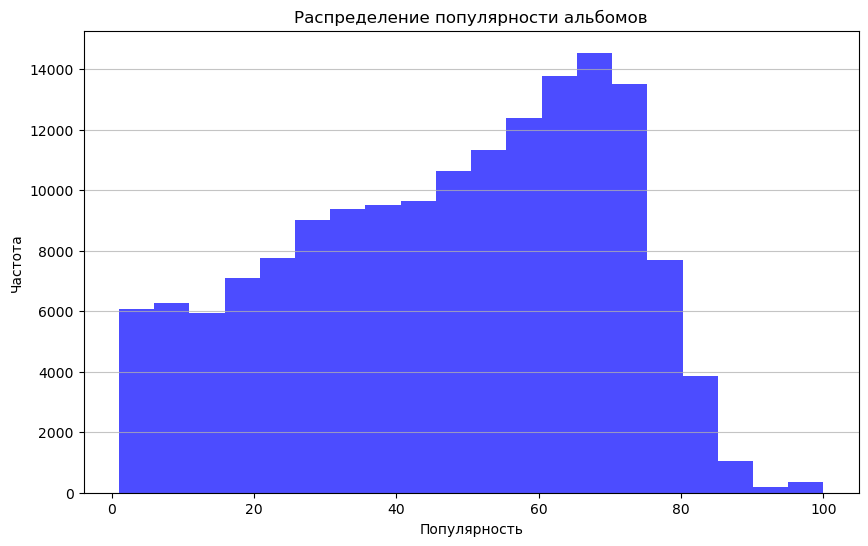

In [20]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(df['popularity'], bins=20, color='blue', alpha=0.7)
plt.title('Распределение популярности альбомов')
plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.savefig('plots/popularity_distribution.png')
plt.show()

### Построение ящиков с усами для числовых признаков

Ящики с усами показывают наличие выбросов в характеристиках длительности (t_dur), танцевальности (t_dance), энергии (t_energy), тональности (t_key), модальности (t_mode), разборчивости слов (t_speech), достоверности (t_acous), инструментальности (t_ins), живучести (t_live), позитивности (t_val), времени (t_sig) и темпа (t_tempo).
Например, некоторые треки имеют очень высокие значения танцевальности, что может указывать на их предназначение для клубной музыки или танцевальных мероприятий. Наличие выбросов также может свидетельствовать о разнообразии музыкальных стилей в датасете.

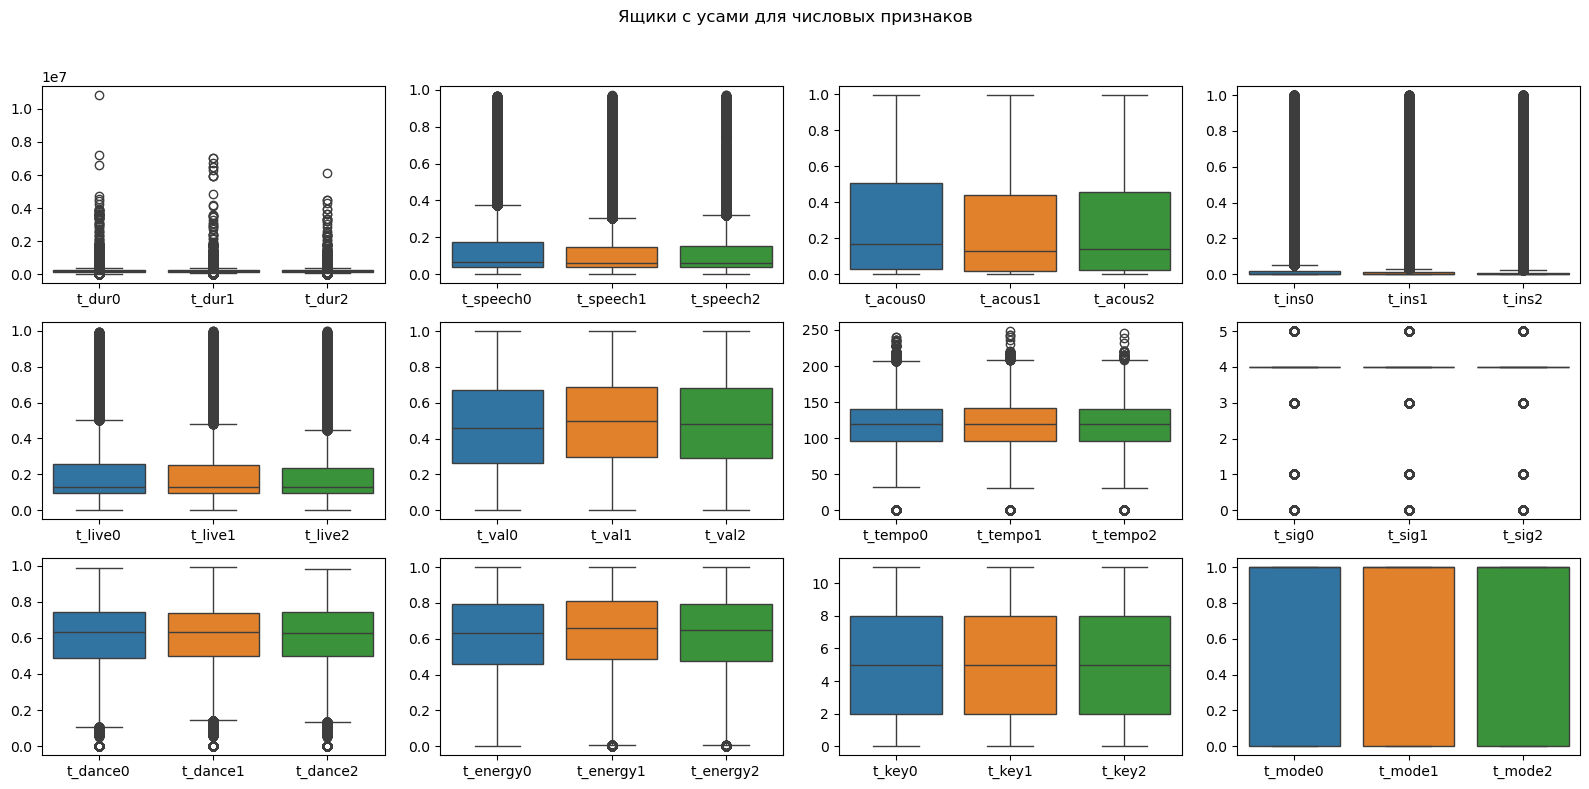

In [26]:
numerical_features = ['t_dur0', 't_dur1', 't_dur2', 't_speech0', 't_speech1', 't_speech2', 't_acous0', 't_acous1',
                      't_acous2', 't_ins0', 't_ins1', 't_ins2', 't_live0', 't_live1', 't_live2', 't_val0', 't_val1',
                      't_val2', 't_tempo0', 't_tempo1', 't_tempo2', 't_sig0', 't_sig1', 't_sig2', 't_dance0',
                      't_dance1', 't_dance2', 't_energy0', 't_energy1', 't_energy2', 't_key0', 't_key1', 't_key2',
                      't_mode0', 't_mode1', 't_mode2']

figure, axes = plt.subplots(3, 4, figsize=(16, 8))
figure.suptitle('Ящики с усами для числовых признаков')

axes = axes.flatten()

for i in range(0, len(numerical_features), 3):
    features_to_plot = numerical_features[i:i + 3]

    sns.boxplot(data=df[features_to_plot], ax=axes[i // 3])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('plots/boxplots_numerical_features.png')
plt.show()

### Построение диаграммы для текстового признака artists

Столбиковая диаграмма показывает, что несколько исполнителей доминируют в датасете по количеству альбомов.
Это может указывать на их активность в музыкальной индустрии и популярность среди слушателей.
Если наблюдается значительный дисбаланс (например, один или два исполнителя имеют значительно больше альбомов), это может свидетельствовать о тенденциях в музыкальной индустрии.

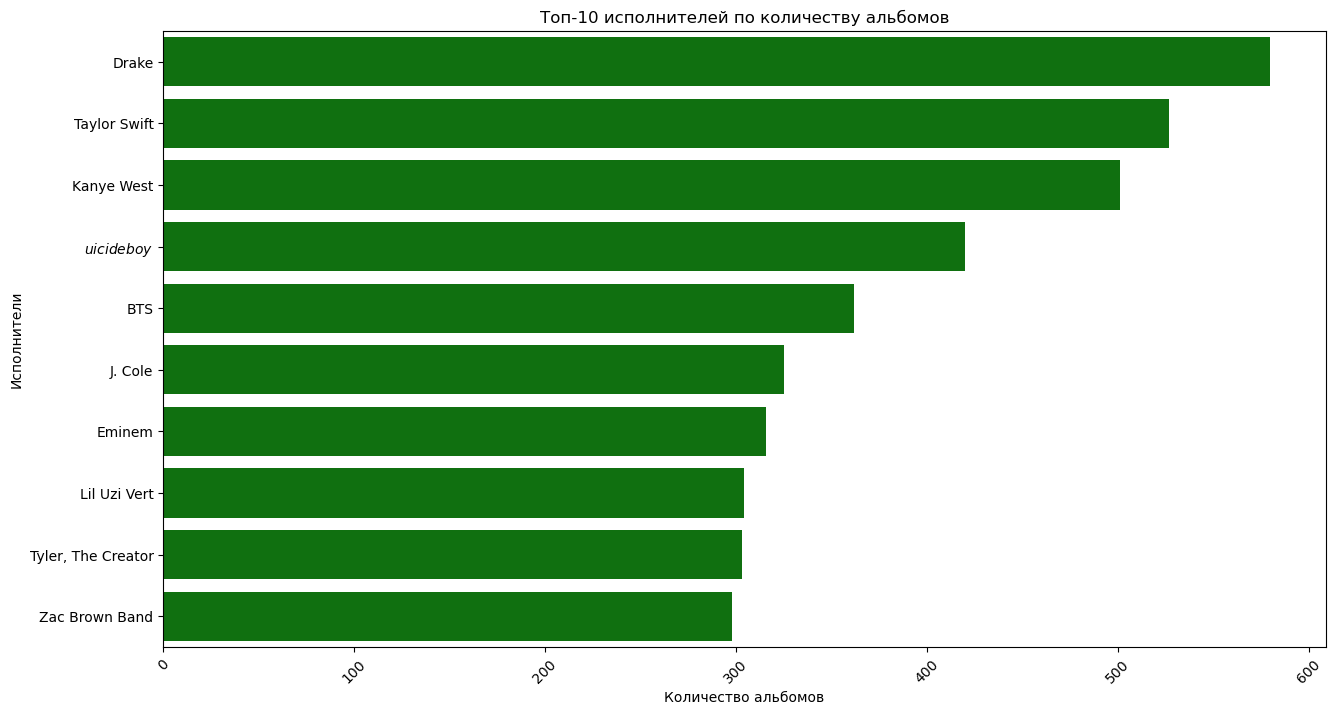

In [30]:
df['artists'] = df['artists'].str.rstrip(', ')
filtered_df = df[df['artists'] != 'Various Artists']
top_artists = filtered_df['artists'].value_counts().head(10)
top_artists_df = top_artists.reset_index()
top_artists_df.columns = ['artists', 'album_count']

plt.figure(figsize=(15, 8))
sns.barplot(y='artists', x='album_count', data=top_artists_df, color='green')
plt.title('Топ-10 исполнителей по количеству альбомов')
plt.xticks(rotation=45)
plt.ylabel('Исполнители')
plt.xlabel('Количество альбомов')
plt.savefig('plots/top_artists_distribution.png')
plt.show()

### Дополнительный анализ данных

По ящикам с усами можно заметить, что числовые характеристики как длительности (t_dur), танцевальности (t_dance), разборчивости слов (t_speech), инструментальности (t_ins), живучести (t_live), времени (t_sig) и темпа (t_tempo) имеют дисбаланс. Рассмотрим эти признаки детальнее.

In [33]:
def plot_histograms(data, columns, title, xlabel, ylabel, colors, bins, save_path):
    plt.figure(figsize=(12, 8))

    for col, color in zip(columns, colors):
        sns.histplot(data[col], bins=bins, kde=True, color=color, label=col, alpha=0.5)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.savefig(save_path)
    plt.show()

plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

#### 1. Построение гистограмм для t_dance0, t_dance1, t_dance2

Графики показывают распределение танцевальности для трех различных значений. Они имеют схожие распределения, это может указывать на то, что все версии треков имеют схожие характеристики по танцевальности. Если же одно из значений значительно отличается от других, это может указывать на уникальные особенности одной из версий.

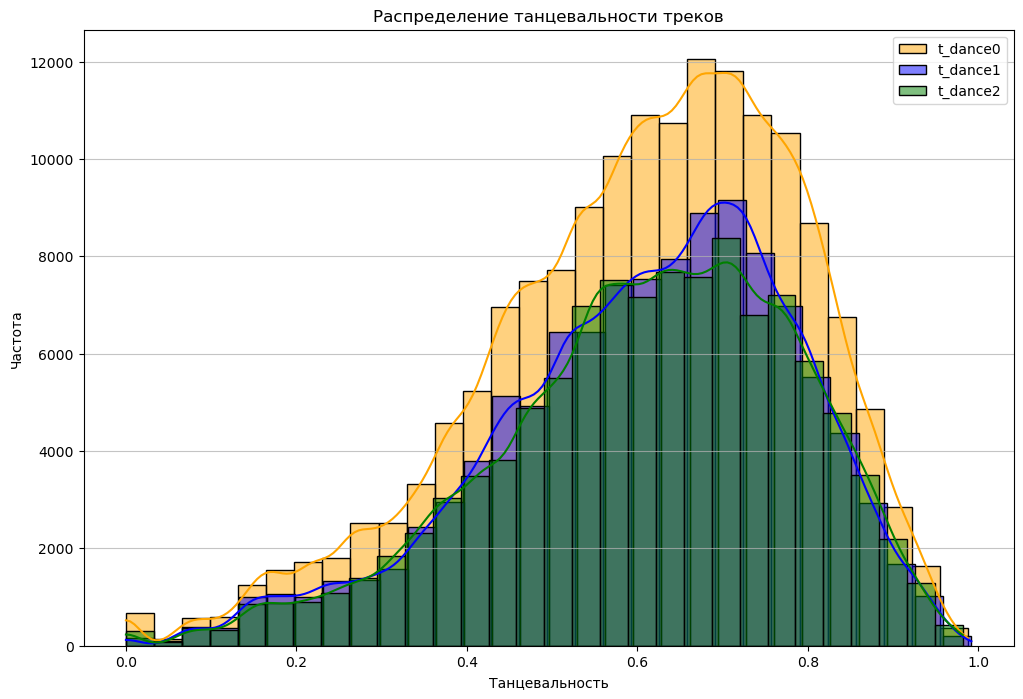

In [36]:
dance_columns = ['t_dance0', 't_dance1', 't_dance2']
dance_colors = ['orange', 'blue', 'green']
plot_histograms(df, dance_columns, 'Распределение танцевальности треков', 'Танцевальность',
                'Частота', dance_colors, bins=30, save_path='plots/danceability_multiple_distribution.png')

#### 2. Построение гистограмм для t_dur0, t_dur1, t_dur2

Гистограмма показывает, что длительность треков варьируется от коротких (менее 2 минут) до длинных (более 6 минут). Наиболее частые значения длительности находятся в диапазоне от 3 до 4 минут, что соответствует стандартной длине большинства поп- и рок-композиций.
Наличие выбросов в обеих крайностях может указывать на наличие экспериментальных треков или композиций в жанрах, таких как классическая музыка или электронная музыка, где длительность может значительно варьироваться.


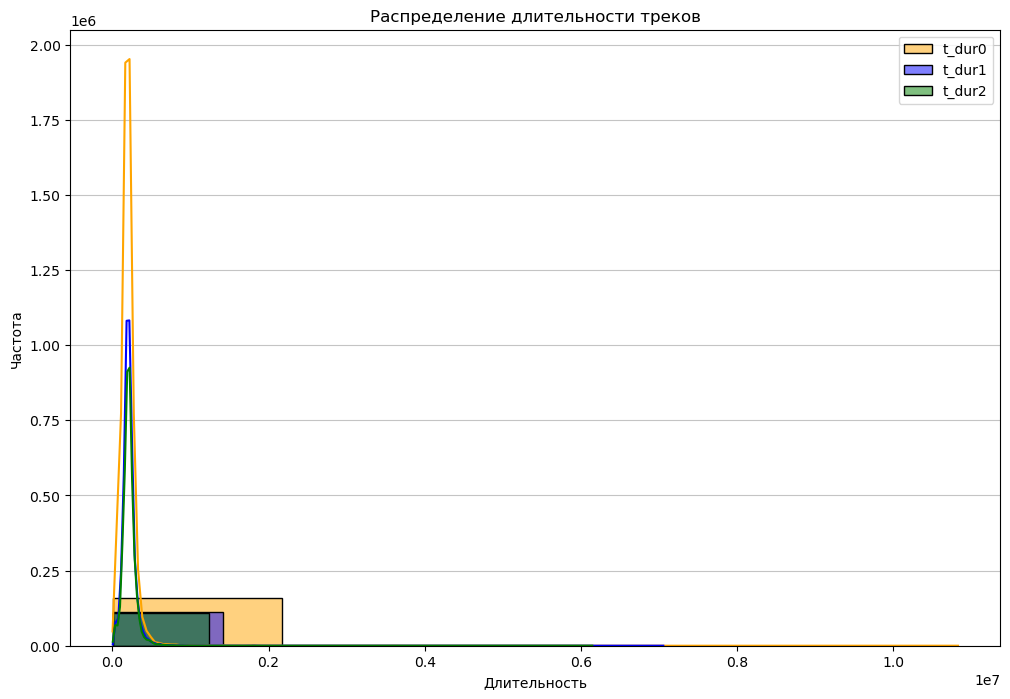

In [39]:
dur_columns = ['t_dur0', 't_dur1', 't_dur2']
dur_colors = ['orange', 'blue', 'green']
plot_histograms(df, dur_columns, 'Распределение длительности треков', 'Длительность', 'Частота',
                dur_colors, bins=5, save_path='plots/duration_distribution.png')

#### 3. Построение гистограмм для t_speech0, t_speech1, t_speech2

Гистограмма разборчивости слов показывает, что большинство треков имеют низкие значения разборчивости (меньше 0.5). Это может указывать на преобладание инструментальной музыки или стилей, таких как EDM и хип-хоп, где вокал не является основным элементом композиции. Высокие значения разборчивости могут быть связаны с песнями, акцентирующими внимание на текстах и вокале.

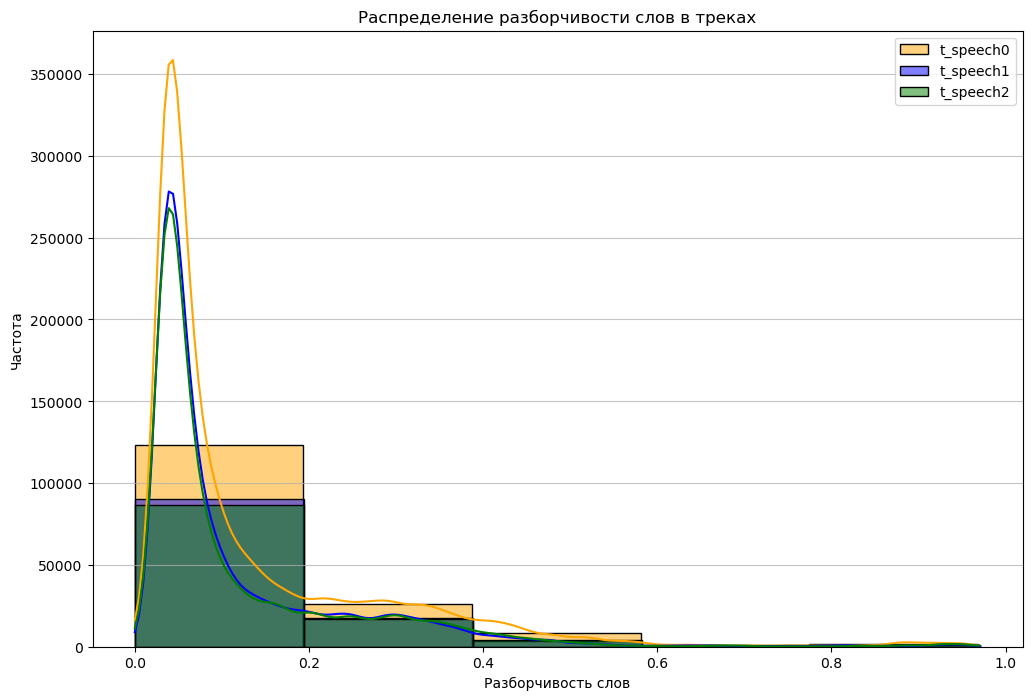

In [42]:
speech_columns = ['t_speech0', 't_speech1', 't_speech2']
speech_colors = ['orange', 'blue', 'green']
plot_histograms(df, speech_columns, 'Распределение разборчивости слов в треках', 'Разборчивость слов',
                'Частота', speech_colors, bins=5, save_path='plots/speech_distribution.png')

#### 4. Построение гистограмм для t_ins0, t_ins1, t_ins2

График инструментальности показывает некоторое количество треков с высокими значениями (ближе к 1.0), что указывает на наличие инструментальных композиций в датасете. Это может быть характерно для жанров, таких как джаз или классическая музыка, где вокал часто отсутствует.
Большое количество имеет низкие значения, что может указывать на песни с ярко выраженным вокалом.

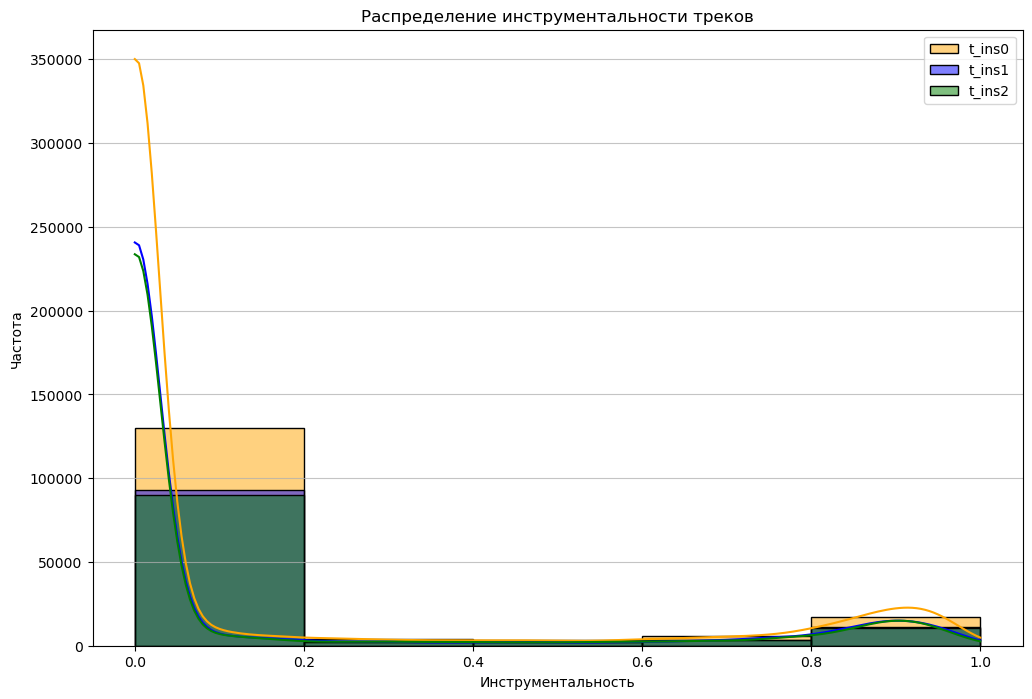

In [45]:
ins_columns = ['t_ins0', 't_ins1', 't_ins2']
ins_colors = ['orange', 'blue', 'green']
plot_histograms(df, ins_columns,'Распределение инструментальности треков', 'Инструментальность',
                'Частота', ins_colors, bins=5, save_path='plots/instrumental_distribution.png')

#### 5. Построение гистограмм для t_live0, t_live1, t_live2

Гистограмма живучести показывает, что большинство треков имеют низкие значения (менее 0.3), что свидетельствует о преобладании студийных записей над записями живых выступлений. Высокие значения живучести (ближе к 1.0) могут указывать на записи живых концертов или выступлений, что может быть интересно для слушателей, предпочитающих живую музыку.

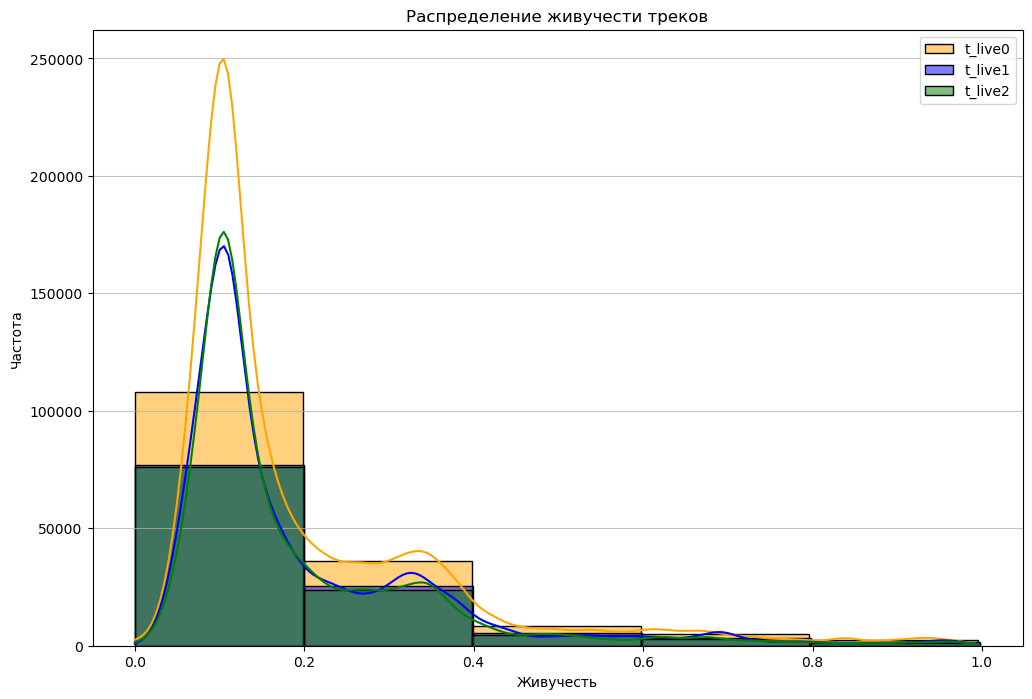

In [48]:
live_columns = ['t_live0', 't_live1', 't_live2']
live_colors = ['orange', 'blue', 'green']
plot_histograms(df, live_columns, 'Распределение живучести треков', 'Живучесть', 'Частота',
                live_colors, bins=5, save_path='plots/liveness_distribution.png')

#### 6. Построение гистограмм для t_sig0, t_sig1, t_sig2

График временной характеристики показывает разнообразие размеров в музыкальных произведениях. Преобладание стандартных размеров (например, 4/4) говорит о том, что большинство треков соответствует популярным музыкальным формам и стилям. Однако наличие других размеров может указывать на экспериментальные композиции или жанры, такие как прогрессивный рок или джаз.

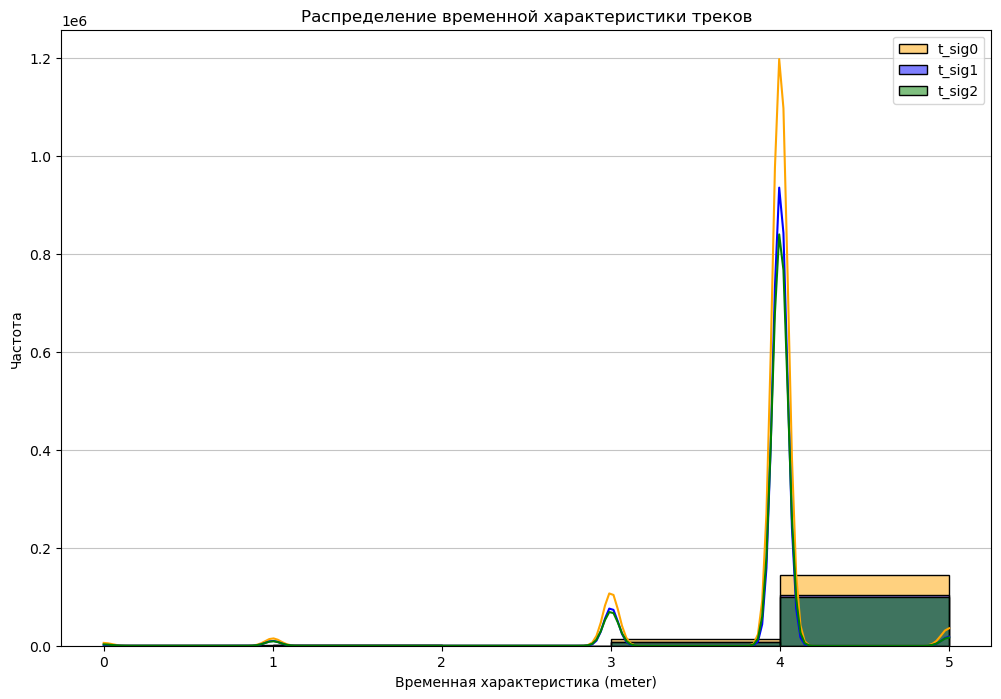

In [51]:
sig_columns = ['t_sig0', 't_sig1', 't_sig2']
sig_colors = ['orange', 'blue', 'green']
plot_histograms(df, sig_columns, 'Распределение временной характеристики треков',
                'Временная характеристика (meter)', 'Частота', sig_colors, bins=5,
                save_path='plots/time_signature_distribution.png')

#### 7. Построение гистограмм для t_tempo0, t_tempo1, t_tempo2

Гистограмма темпа показывает значительное количество треков в диапазоне от 100 до 150 BPM, что соответствует большинству популярных музыкальных стилей, таких как поп и танцевальная музыка. Выбросы на обоих концах диапазона могут указывать на наличие как очень медленных (менее 60 BPM), так и очень быстрых (более 180 BPM) треков, что может быть характерно для определенных жанров, таких как техно.

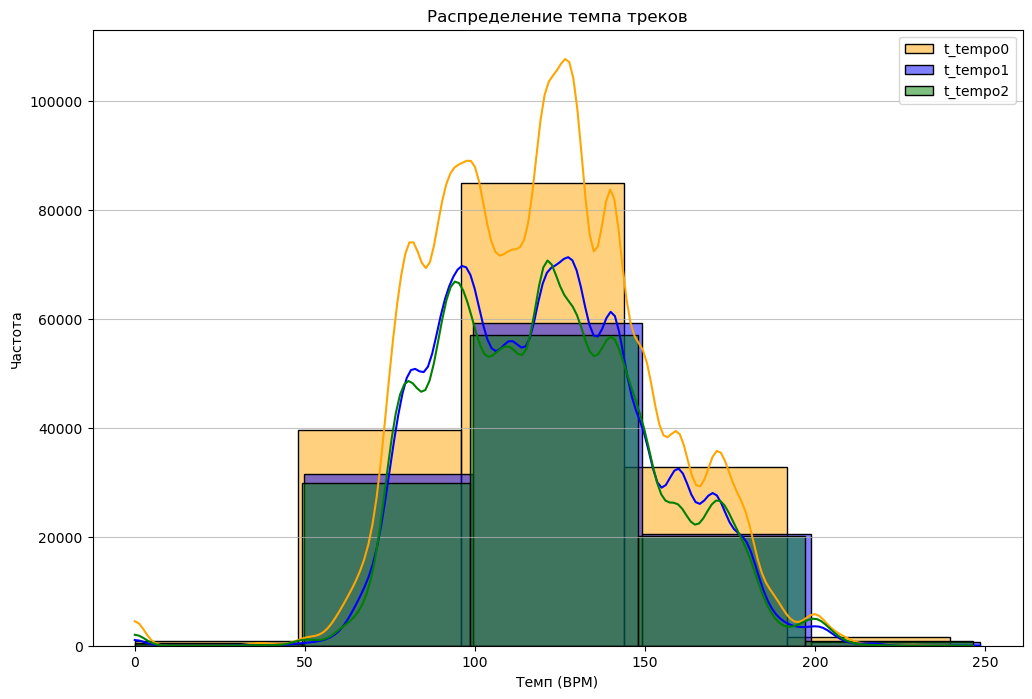

In [54]:
tempo_columns = ['t_tempo0', 't_tempo1', 't_tempo2']
tempo_colors = ['orange', 'blue', 'green']
plot_histograms(df, tempo_columns, 'Распределение темпа треков', 'Темп (BPM)', 'Частота',
                tempo_colors, bins=5, save_path='plots/tempo_distribution.png')

## 2. Binary Classification
Dataset: [NASA | Nearest Earth Objects (1910-2024)](https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024)

В космосе много опасных тел, одно из них - N.E.O. - "Ближайшие земные объекты". Некоторые такие тела действительно представляют опасность для планеты Земля, NASA классифицирует их как "is_hazardous". Этот набор данных содержит ВСЕ наблюдения NASA за подобными объектами с 1910 по 2024 год.


1. __Описание данных__:

+ **neo_id**: уникальный идентификатор для каждого астероида.
+ **name**: название астероида.
+ **absolute_magnitude**: описывает внутреннюю светимость.
+ **estimated_diameter_min**: минимальный расчетный диаметр в километрах.
+ **estimated_diameter_max**: максимальный расчетный диаметр в километрах.
+ **orbiting_body**: планета, вокруг которой вращается астероид.
+ **relative_velocity**: скорость относительно планеты в км/ч.
+ **miss_distance**: пропущенное расстояние в километрах.


2. __Целевая переменная__: **is_hazardous**
Логическая переменная, которая показывает, является ли астероид опасным или нет.

In [66]:
df = pd.read_csv('data/nearest_earth_objects.csv')

### Построение ящика с усами для числовых признаков

Ящик с усами позволяет визуализировать распределение и выбросы для различных числовых признаков: абсолютной светимости, минимального и максимального диаметра, относительной скорости и расстояния пропуска. Для absolute_magnitude и relative_velocity наблюдаются выбросы, которые могут указывать на наличие аномально ярких или быстрых астероидов. estimated_diameter_min и estimated_diameter_max показывают широкий диапазон значений, что также подтверждает наличие крупных объектов среди общего числа. miss_distance не имеет выбросов, что может быть связано с редкими случаями близкого прохождения астероидов.

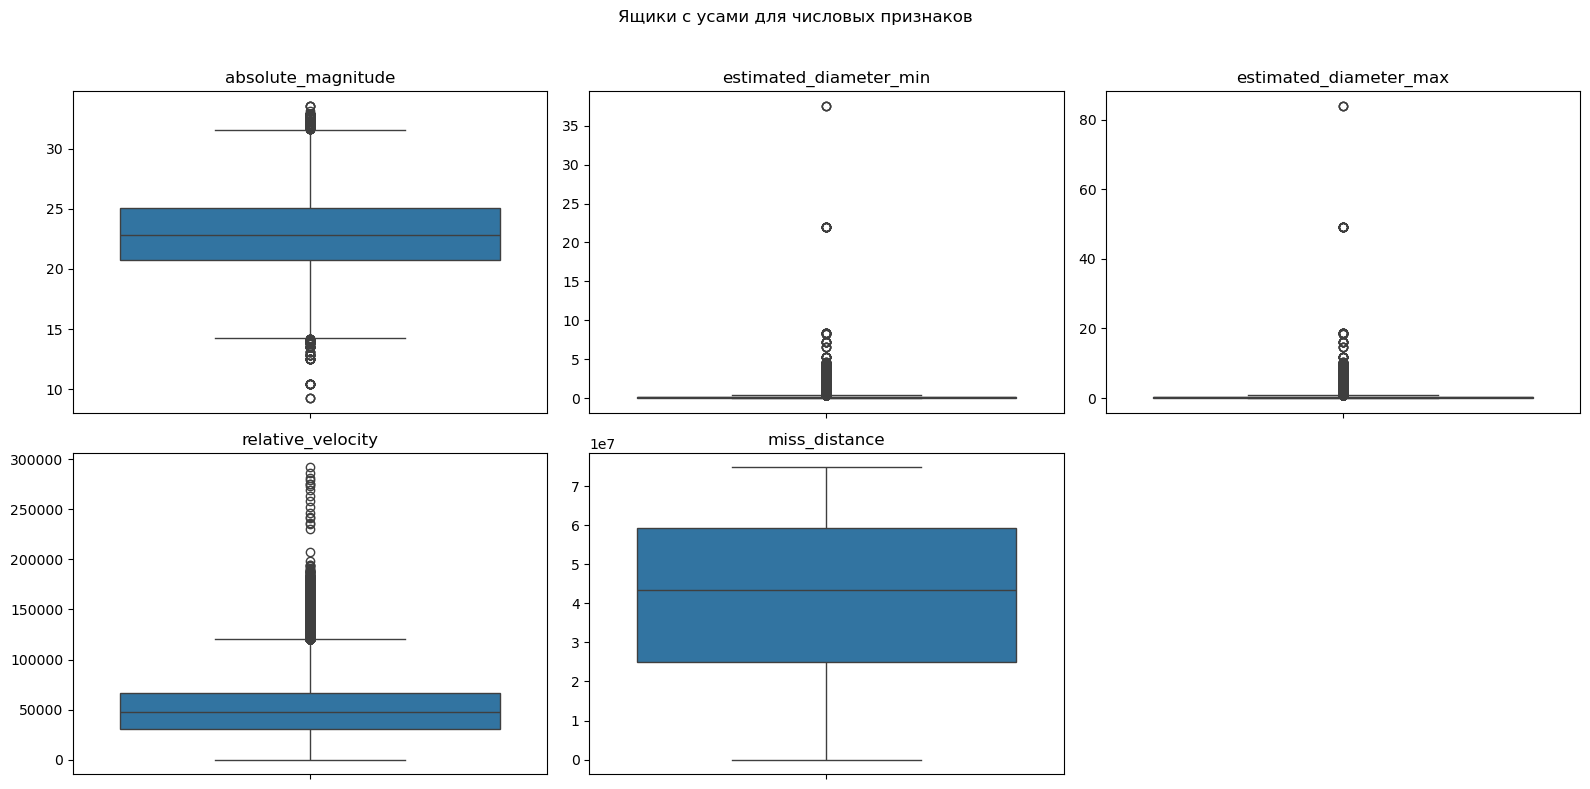

In [68]:
numerical_features = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']

figure, axes = plt.subplots(2, 3, figsize=(16, 8))
figure.suptitle('Ящики с усами для числовых признаков')

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('plots/boxplot_class_numerical_features.png')
plt.show()

### Построение диаграммы распределения для orbiting_body

Все рассматриваемые объекты вращаются вокруг Земли, что ожидаемо, так как мы рассматриваем ближайшие земные объекты.

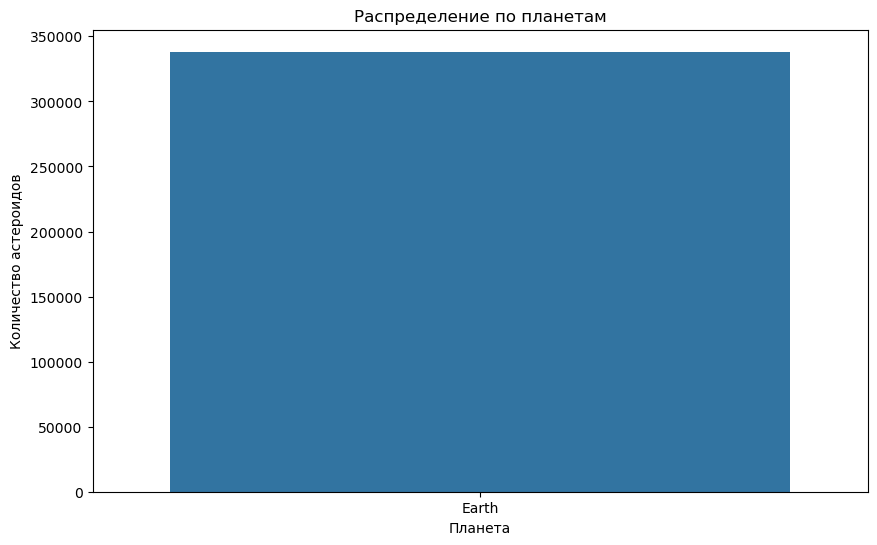

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='orbiting_body')
plt.title('Распределение по планетам')
plt.xlabel('Планета')
plt.ylabel('Количество астероидов')
plt.savefig('plots/countplot_orbiting_body.png')
plt.show()

### Построение графика для целевой переменной

График демонстрирует соотношение между опасными (True) и безопасными (False) астероидами. Явное преобладание безопасных астероидов указывает на то, что большинство наблюдаемых объектов не представляют угрозу для Земли. Однако наличие значительного числа опасных объектов подчеркивает важность мониторинга и изучения N.E.O. для предотвращения потенциальных угроз. Это соотношение может быть полезным для дальнейшего анализа риска и разработки стратегий по защите от возможных столкновений.

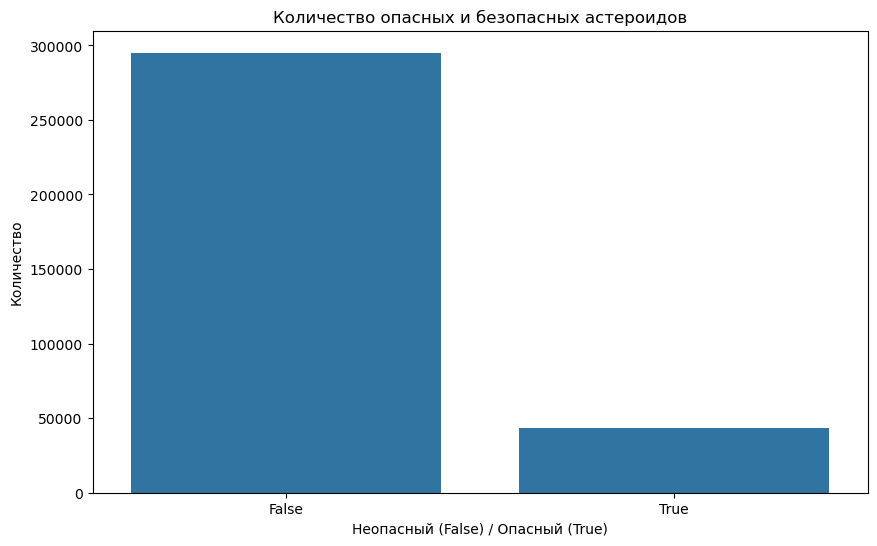

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='is_hazardous')
plt.title('Количество опасных и безопасных астероидов')
plt.xlabel('Неопасный (False) / Опасный (True)')
plt.ylabel('Количество')
plt.savefig('plots/countplot_is_hazardous.png')
plt.show()

### Дополнительный анализ числовых признаков

По ящикам с усами можно заметить, что числовые характеристики как absolute_magnitude,  estimated_diameter_min, estimated_diameter_max, relative_velocity имеют дисбаланс. Рассмотрим эти признаки детальнее.

In [78]:
def plot_histograms(data, columns, title, xlabel, ylabel, bins, save_path, colors=['orange']):
    plt.figure(figsize=(12, 8))

    for col, color in zip(columns, colors):
        sns.histplot(data[col], bins=bins, kde=True, color=color, label=col, alpha=0.5)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.savefig(save_path)
    plt.show()

#### 1. Построение гистограммы для абсолютной светимости

График показывает распределение абсолютной величины астероидов. Наличие пиков может указывать на определенные диапазоны величин, где сосредоточено большее количество объектов. Если наблюдаются длинные хвосты, это может свидетельствовать о наличии выбросов.

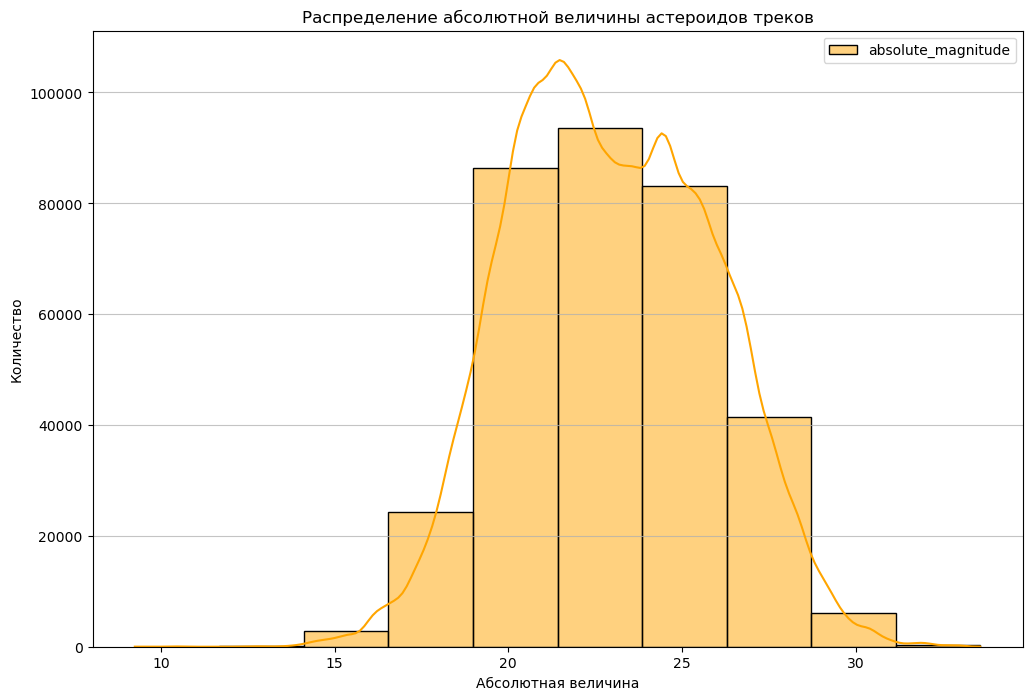

In [86]:
columns = ['absolute_magnitude']
plot_histograms(df, columns, 'Распределение абсолютной величины астероидов треков',
                'Абсолютная величина', 'Количество', bins=10,
                save_path='plots/absolute_magnitude_distribution.png')

#### 2. Построение гистограммы для минимального и максимального диаметра

График распределения минимального и максимального диаметра показывает, как часто встречаются астероиды разных размеров. Наличие пиков может указывать на типичные размеры астероидов, а также на возможные выбросы в виде очень маленьких или очень больших объектов. Кривая плотности (kde) подчеркивает, что распределение имеет правостороннюю асимметрию, с более высокой концентрацией меньших объектов.

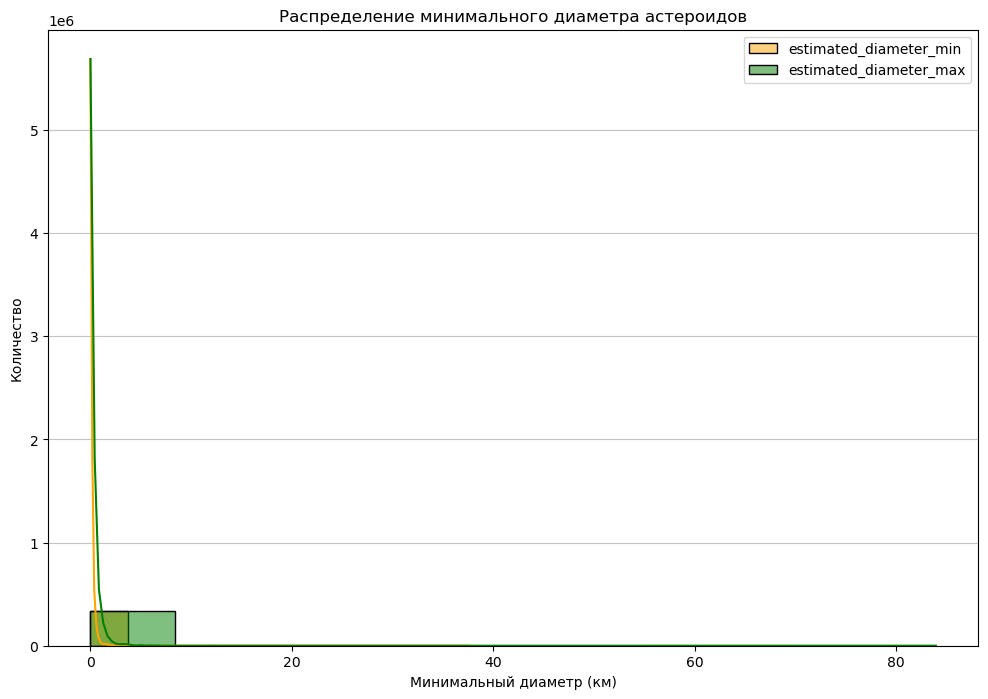

In [90]:
columns = ['estimated_diameter_min', 'estimated_diameter_max']
plot_histograms(df, columns, 'Распределение минимального диаметра астероидов',
                'Минимальный диаметр (км)', 'Количество', colors=['orange', 'green'], bins=10,
                save_path='plots/estimated_diameter_distribution.png')

#### 3. Построение гистограммы для относительной скорости

График относительной скорости показывает, как быстро астероиды движутся относительно Земли. Наличие пиков может указывать на определенные скорости, которые чаще всего встречаются среди наблюдаемых объектов.

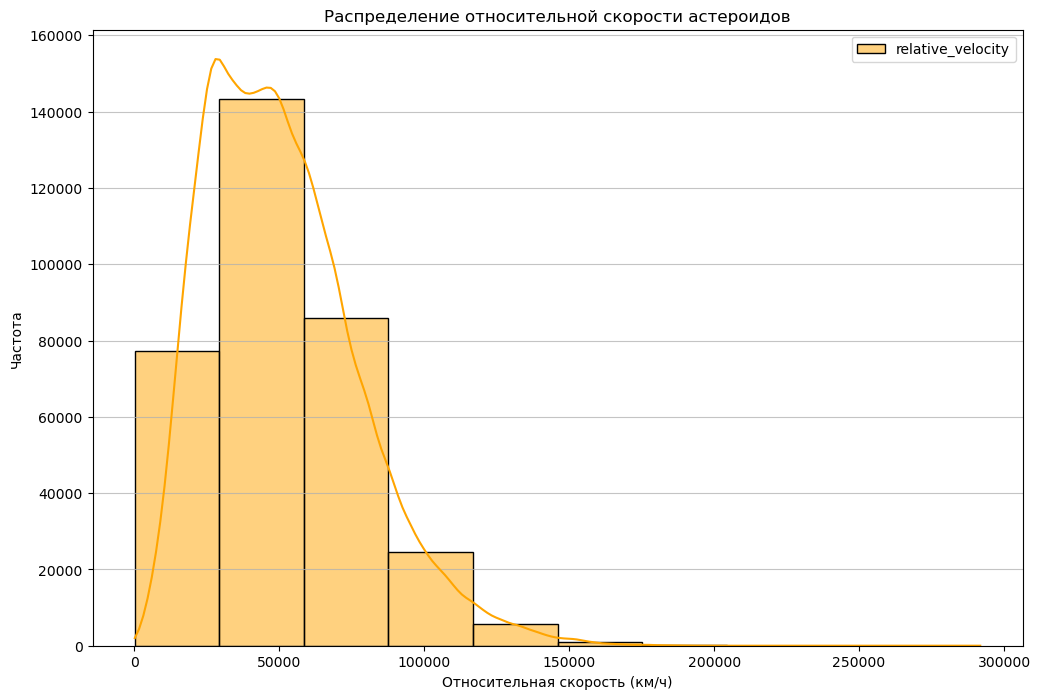

In [93]:
columns = ['relative_velocity']
plot_histograms(df, columns, 'Распределение относительной скорости астероидов',
                'Относительная скорость (км/ч)', 'Частота', bins=10,
                save_path='plots/relative_velocity_distribution.png')